# Seaborn

### Tipos de Gráficas

1. replot (Relacional).
   * scatterplot (Dispersión)
   * lineplot (lineal)
2. displot (Distribuciones).
   * histplot
   * kdeplot
   * ecdfplot
   * rugplot
3. catplot (Categóricos).
   * stripplot
   * swarmplot
   * boxplot
   * violinplot
   * pointplot
   * barplot

### Datos a Visualizar

Pinguinos
1. Longitud del pico.
2. Profundidad del pico.
3. Longitud de la aleta.
4. Masa Corporal.
5. Especie.
6. Isla.
7. Sexo

***Notas***
* `sns.get_dataset_names()`: toda las plantillas de datos pregargadas de la librería.

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Esto ya nos regresa un dataframe
pinguinos = sns.load_dataset("penguins")
pinguinos.columns = [
    "especie",
    "isla",
    "longitud_pico",
    "profundidad_pico",
    "longitud_aleta",
    "masa",
    "sexo"
]
pinguinos

,especie,isla,longitud_pico,profundidad_pico,longitud_aleta,masa,sexo
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


### Primera gráfica de Seaborn

***NOTAS***
* `style=`: whitegrid, white, darkgrid, ticks
* `context`: paper (hace todo más pequeño), notebook (default), talk(más grande), poster(agrandado)
* `aspect`: Podemos reducir a la mitad o algarlo en proporción.
* `markers=["s",".","P","d"]`: cuadrados, puntos, cruces, diamentes.

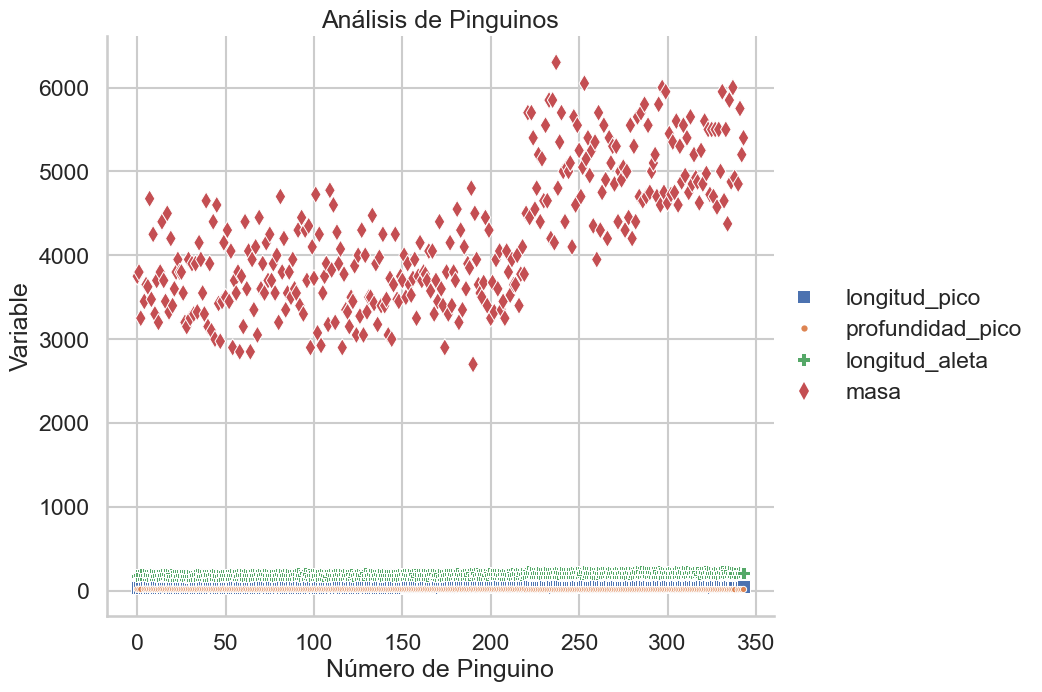

In [23]:
# establecemos el color del fondo
sns.set_theme(style="whitegrid", context="talk")
# Cargamos los datos
relational = sns.relplot(
    data=pinguinos,
    height=7,
    aspect=1.2,
    markers=["s",".","P","d"])
relational.set(title="Análisis de Pinguinos")
relational.set_ylabels("Variable")
relational.set_xlabels("Número de Pinguino")
plt.show()

### Diagramas de Dispersión

***NOTAS***
* A mayor longuitud de pico y aleta, más masa tendrá el pinguino.
* La especie G es la que tiene más grande las aletas y pico.

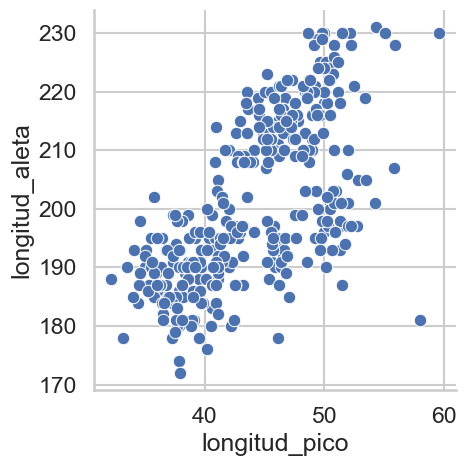

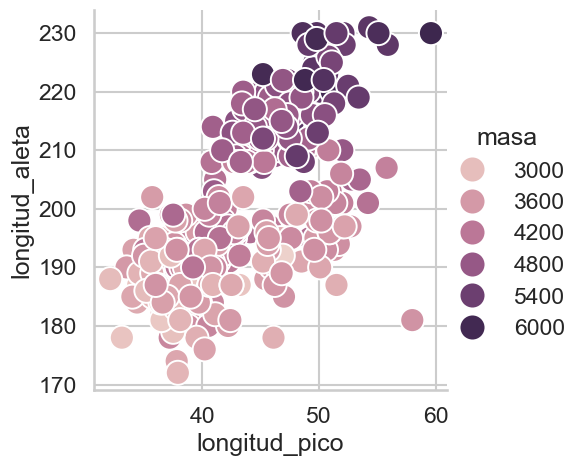

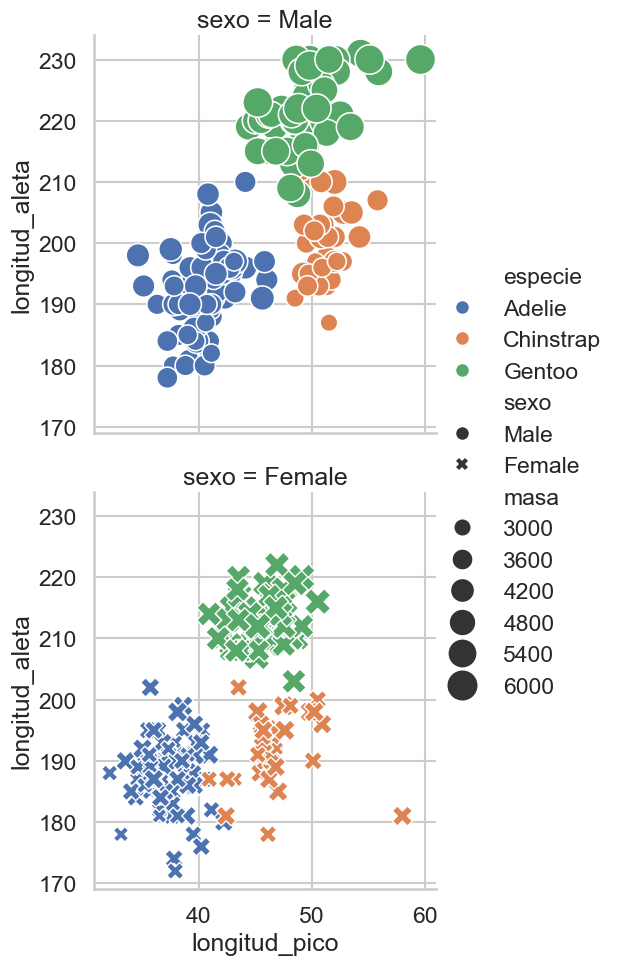

In [33]:
### Gráfica Normal, pero no nos da mucha información
sns.relplot(
    data=pinguinos,
    x="longitud_pico",
    y="longitud_aleta")

### Gráfica en base a la masa
sns.relplot(
    data=pinguinos,
    x="longitud_pico",
    y="longitud_aleta",
    hue="masa",
    s=300
)

### Gráfica en base a la especie, separando por sexo y el tamaño en base a la masa.
sns.relplot(
    data=pinguinos,
    x="longitud_pico",
    y="longitud_aleta",
    hue="especie",
    row="sexo",
    size="masa",
    sizes=(100,500),
    style="sexo"
)

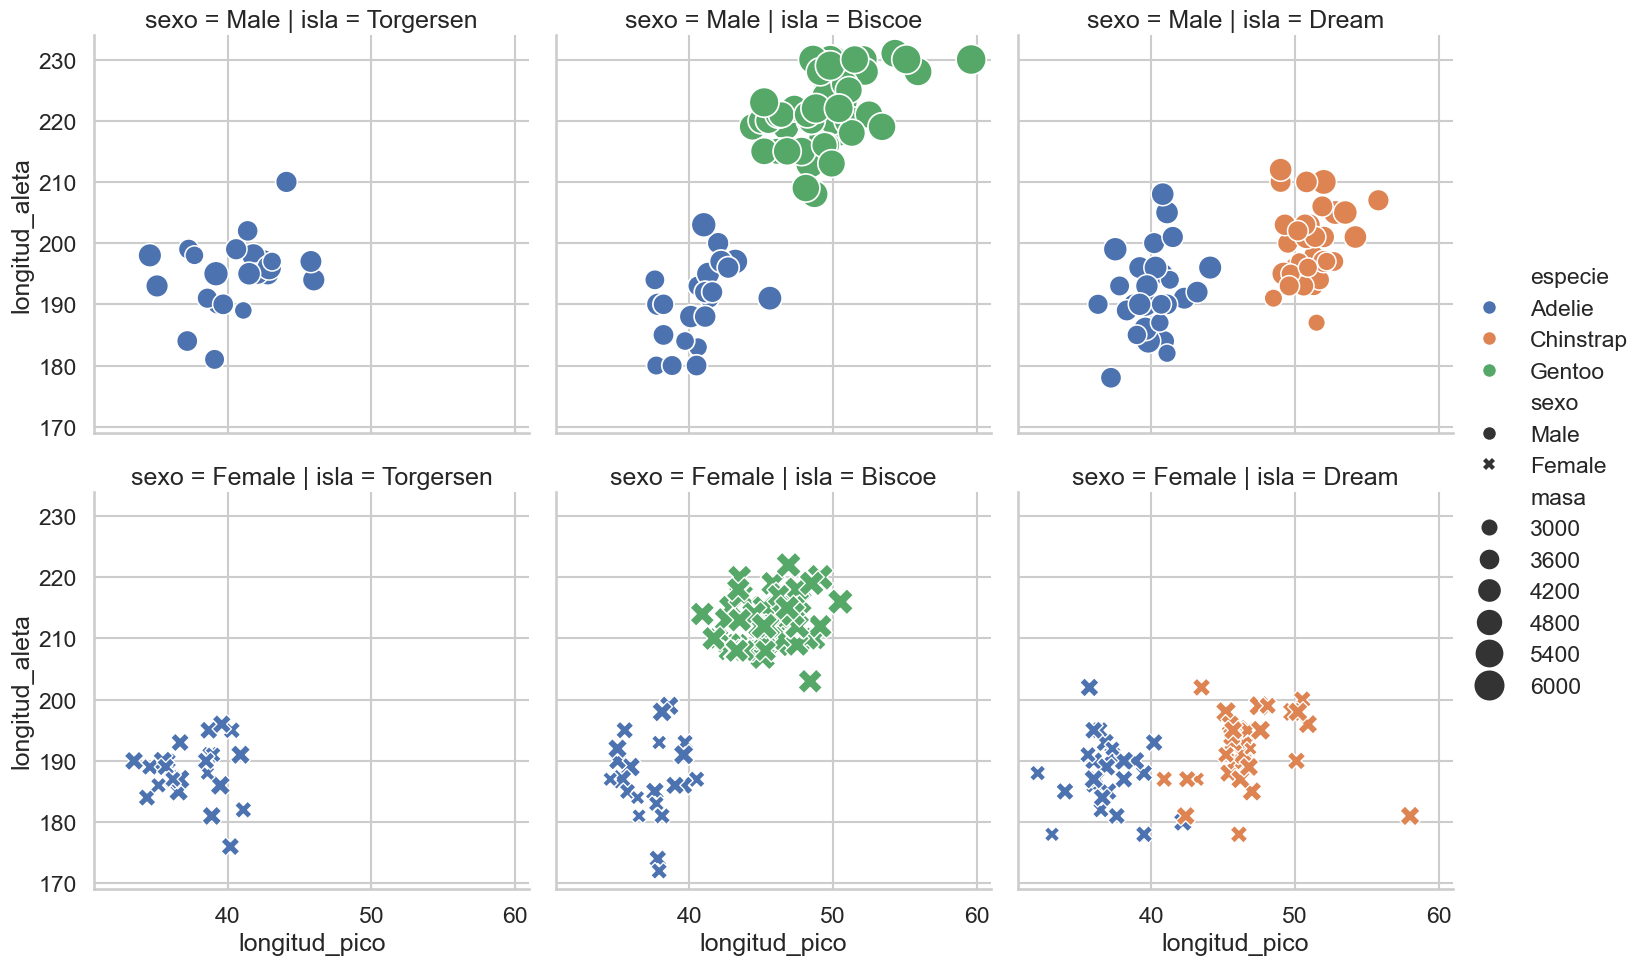

In [35]:
### Separar ahora también por isla.
sns.relplot(
    data=pinguinos,
    x="longitud_pico",
    y="longitud_aleta",
    hue="especie",
    col="isla",
    row="sexo",
    size="masa",
    sizes=(100,500),
    style="sexo"
)

### Gráficos de Líneas

* Por default para las relaciones es la de disperción.
* En este ocasión estamos separando por sexo.
* Agregamos que el estilo de la linea (su forma no color), dependa del sexo.

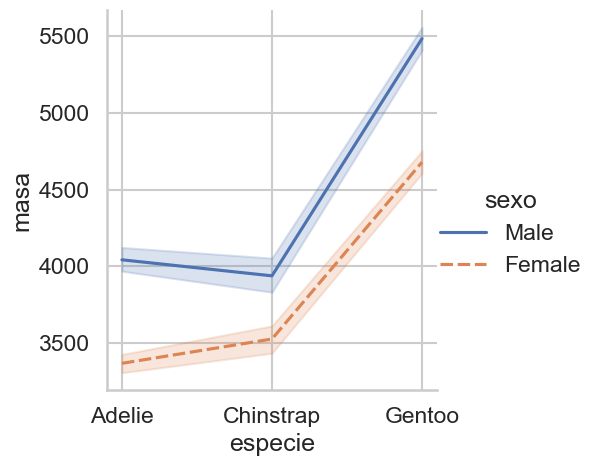

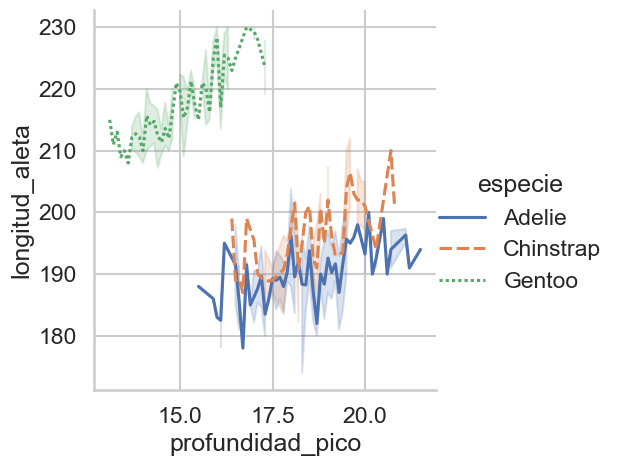

In [40]:
sns.relplot(
    data=pinguinos,
    x="especie",
    y="masa",
    kind="line",
    hue="sexo",
    style="sexo"
)
plt.show()

sns.relplot(
    data=pinguinos,
    x="profundidad_pico",
    y="longitud_aleta",
    kind="line",
    hue="especie",
    style="especie"
)
plt.show()

### Combinando Gráficas

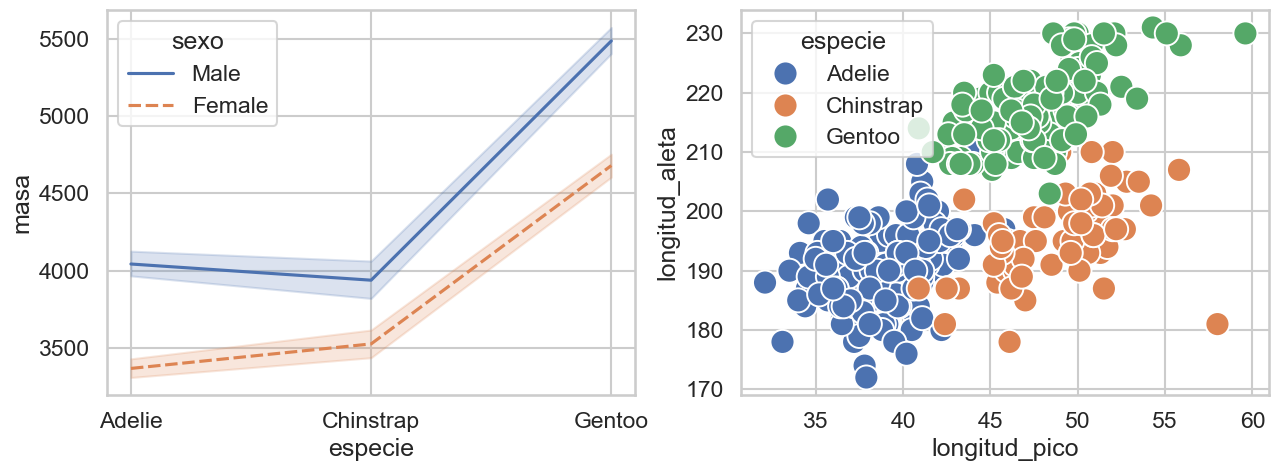

In [43]:

### Si no especificamos esto saldrían amontonadas
# En un renglón mete 2 figuras.
figura, ejes = plt.subplots(1,2, figsize=(15,5))

sns.lineplot(
    data=pinguinos,
    x="especie",
    y="masa",
    hue="sexo",
    style="sexo",
    ax=ejes[0]
)

sns.scatterplot(
    data=pinguinos,
    x="longitud_pico",
    y="longitud_aleta",
    hue="especie",
    s=300,
    ax=ejes[1]
)

plt.show()